In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')    

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

N = 30000

x_train = x_train[:N] / 255
x_test = x_test[:N] / 255

y_train = y_train[:N]
y_test = y_test[:N]


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30000, 28, 28), (30000,), (10000, 28, 28), (10000,))

## Base Line

Epoch 1/5


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - loss: 0.7362 - sparse_categorical_accuracy: 0.7443 - val_loss: 0.4580 - val_sparse_categorical_accuracy: 0.8365
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - loss: 0.4175 - sparse_categorical_accuracy: 0.8478 - val_loss: 0.4080 - val_sparse_categorical_accuracy: 0.8548
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.3689 - sparse_categorical_accuracy: 0.8639 - val_loss: 0.3930 - val_sparse_categorical_accuracy: 0.8585
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 0.3328 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.3816 - val_sparse_categorical_accuracy: 0.8630
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 0.3078 - sparse_categorical_accuracy: 0.8855 - val_loss: 0.4042 - val_sparse_categorical_accuracy: 0.8527


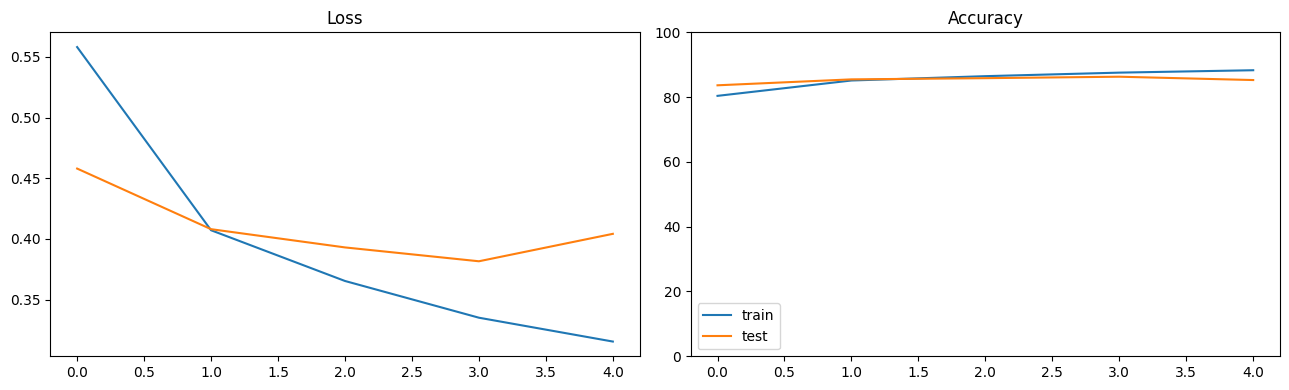

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

#model.summary()

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
plot_history(history)

## Optimizers

Adam


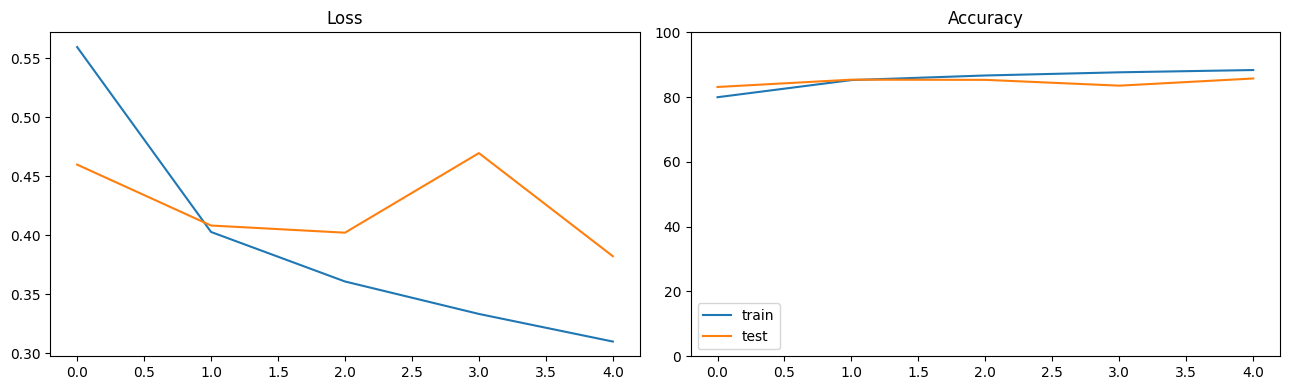

Adagrad


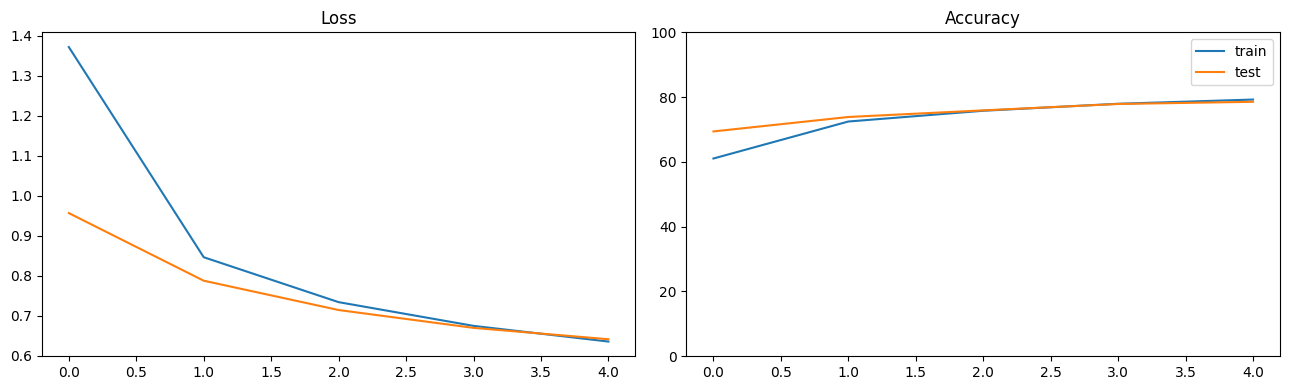

AdamW


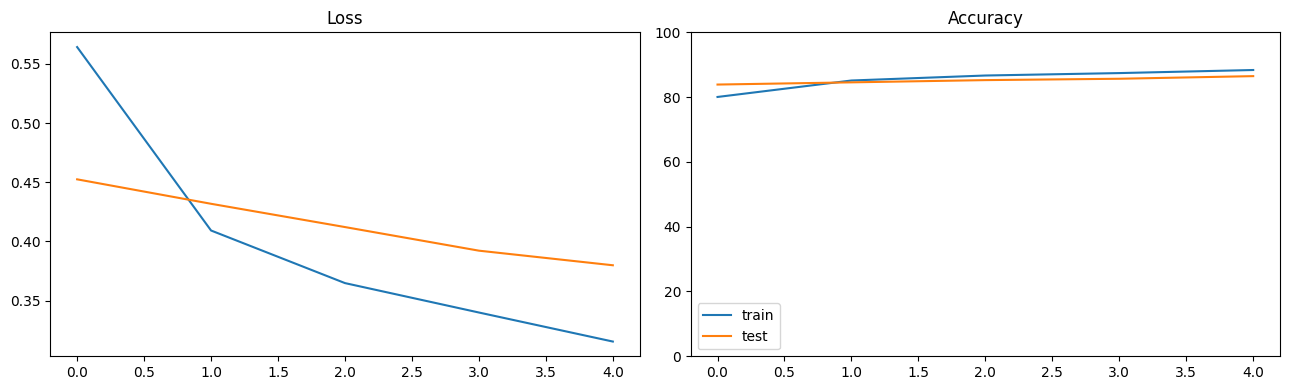

Adamax


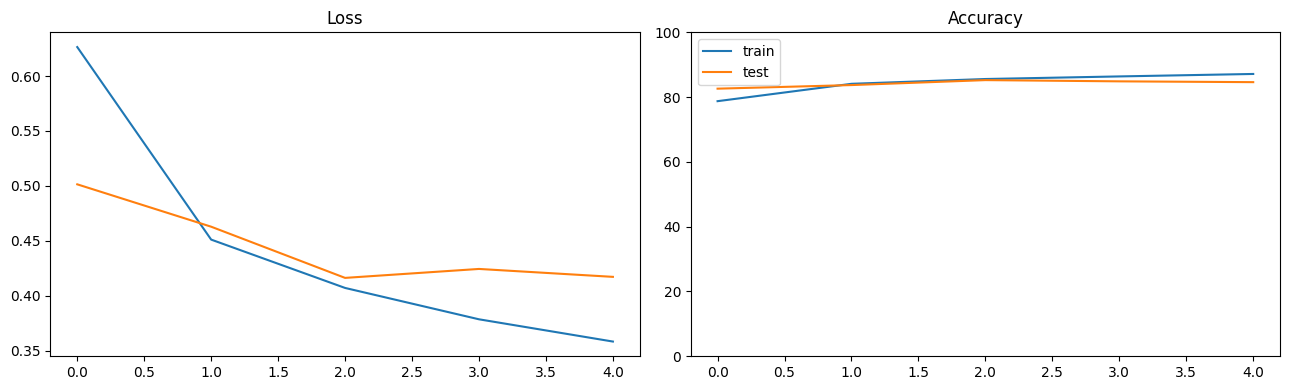

Ftrl


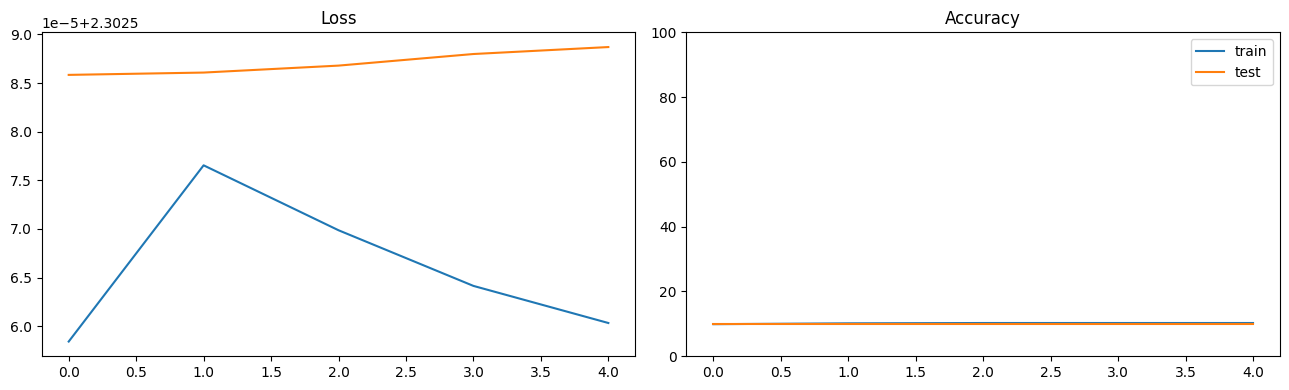

Lion


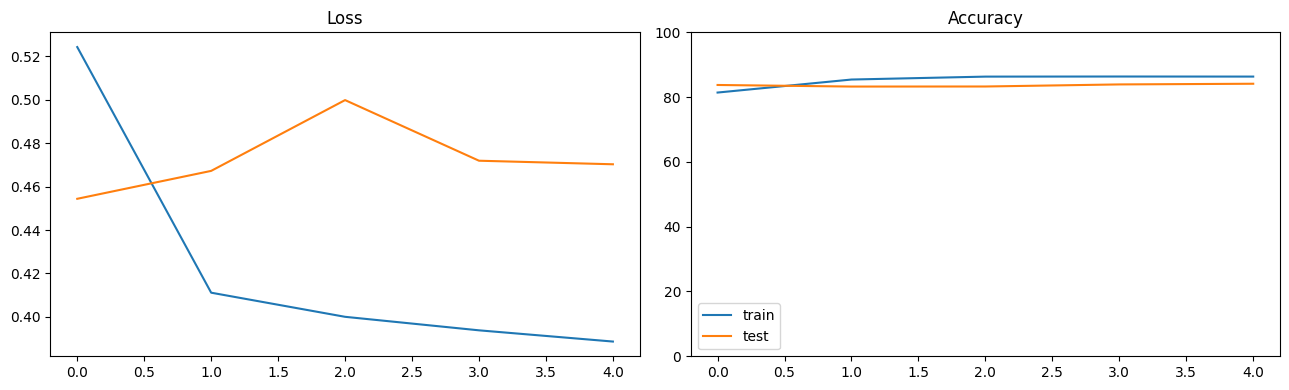

Nadam


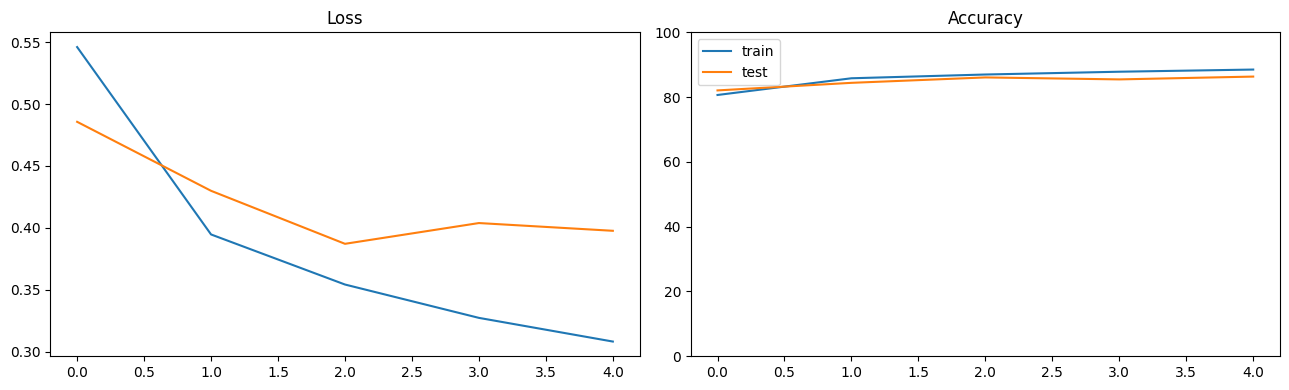

RMSprop


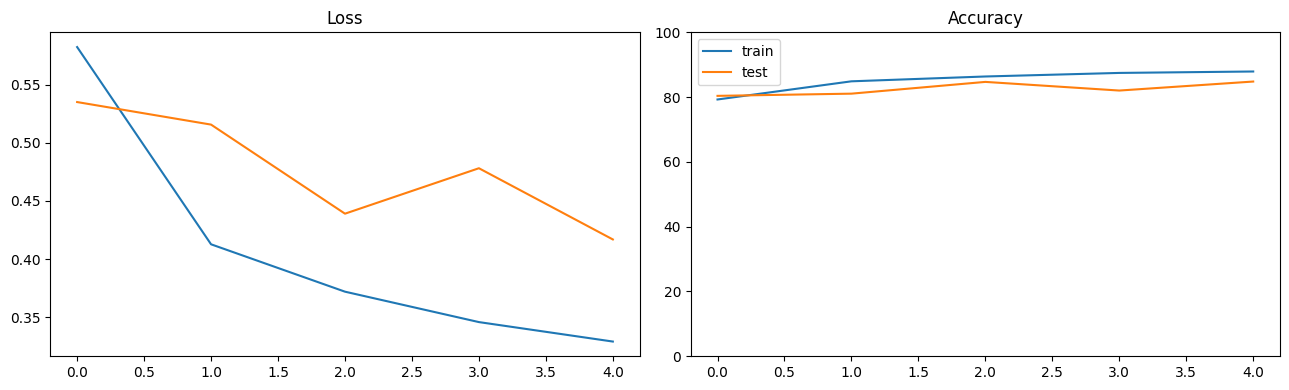

SGD


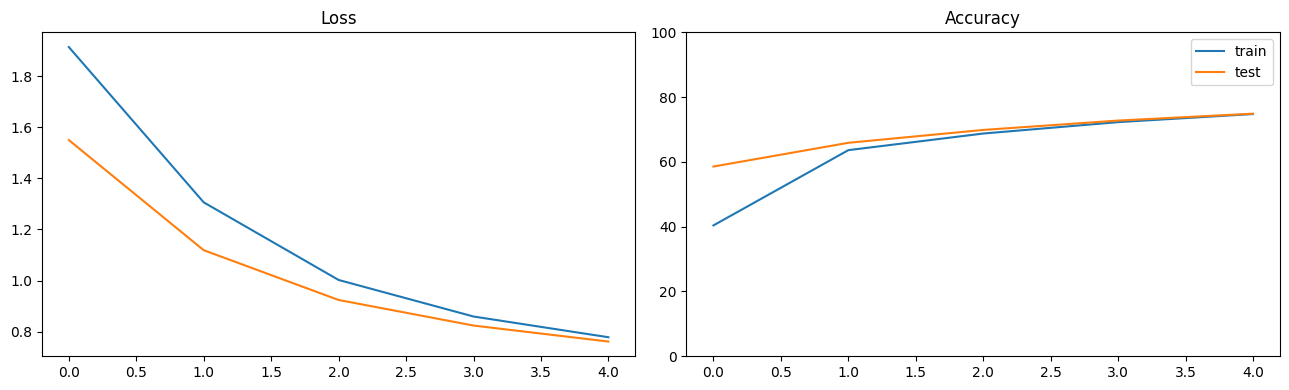

In [5]:
collect = {}

optimizers_list = [
    tf.keras.optimizers.Adam,
    tf.keras.optimizers.Adagrad,
    tf.keras.optimizers.AdamW,
    tf.keras.optimizers.Adamax,
    tf.keras.optimizers.Ftrl,
    tf.keras.optimizers.Lion,
    tf.keras.optimizers.Nadam,
    tf.keras.optimizers.RMSprop,
    tf.keras.optimizers.SGD
]

for opt in optimizers_list:
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=opt(learning_rate=0.001),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    #model.summary()

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
    print(opt.__name__)
    plot_history(history)
    collect[opt.__name__] = history.history['val_sparse_categorical_accuracy']

In [6]:
pd.DataFrame(collect).T.style.background_gradient(cmap='viridis')

,0,1,2,3,4
Adam,0.831300,0.853900,0.853300,0.835400,0.857500
Adagrad,0.694100,0.738700,0.759100,0.778800,0.785600
AdamW,0.838800,0.845600,0.852500,0.856700,0.864800
Adamax,0.826100,0.837200,0.852500,0.848700,0.846200
Ftrl,0.100000,0.100000,0.100000,0.100000,0.100000
Lion,0.837500,0.832600,0.832800,0.839200,0.841300
Nadam,0.820700,0.844100,0.860800,0.854700,0.863400
RMSprop,0.803900,0.810700,0.847000,0.820300,0.848100
SGD,0.585700,0.659000,0.698700,0.727600,0.748900


## Activation Functions

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


linear


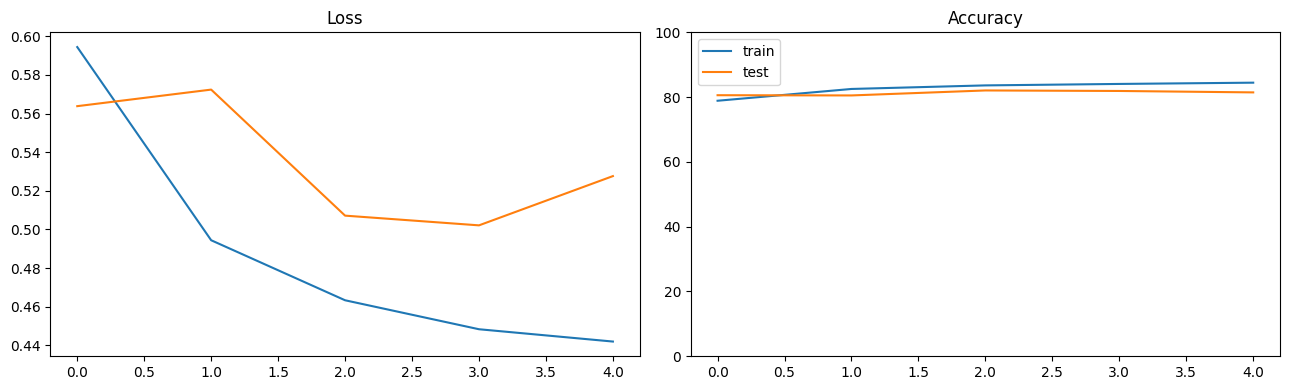

relu


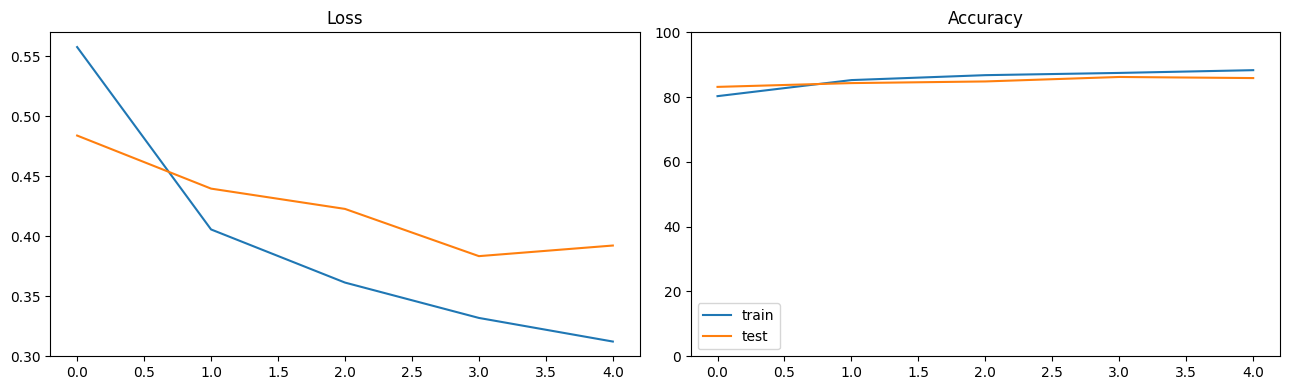

tanh


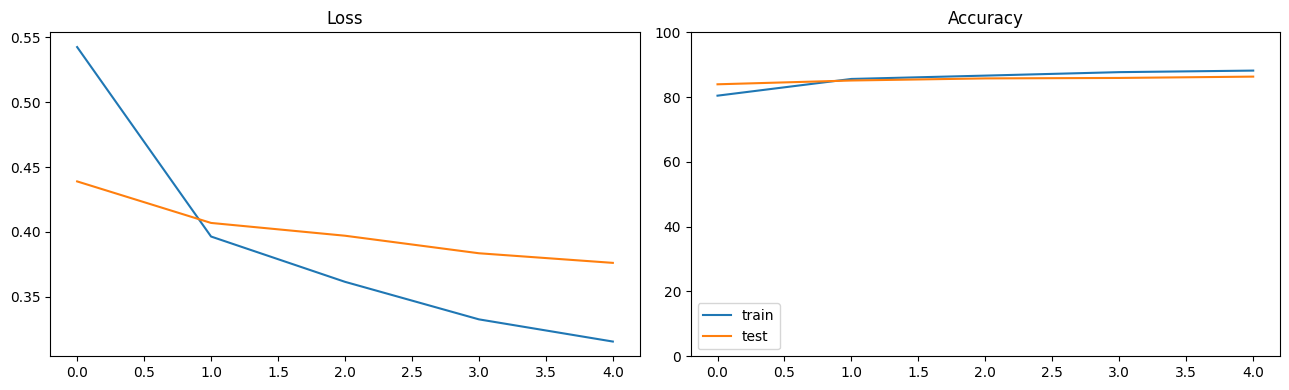

elu


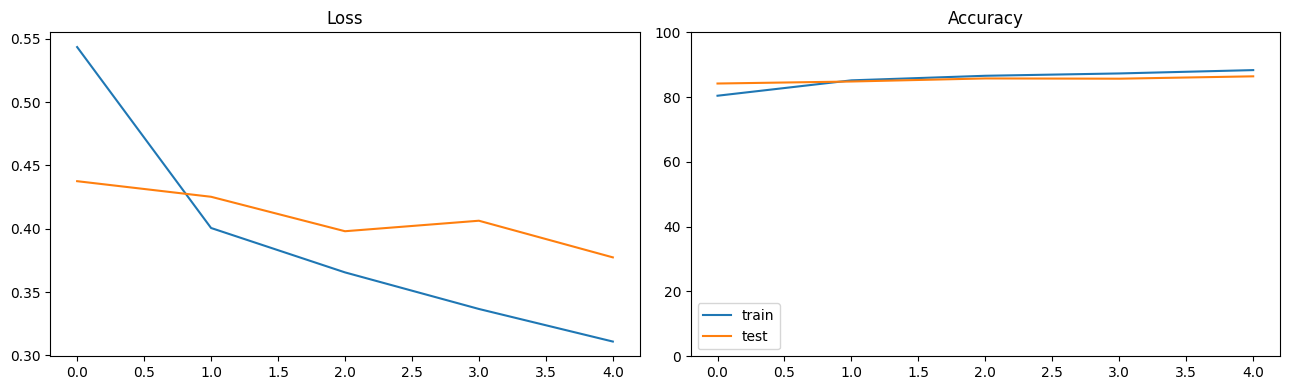

softplus


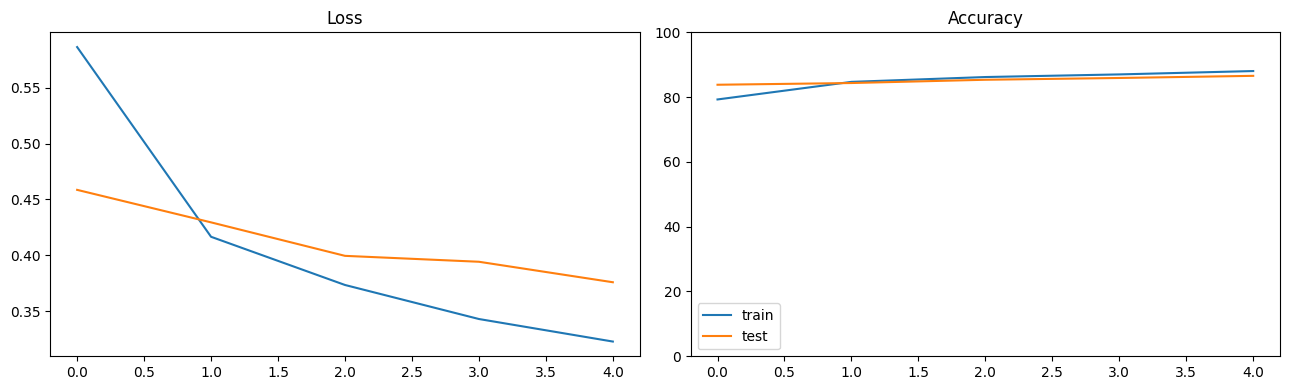

sigmoid


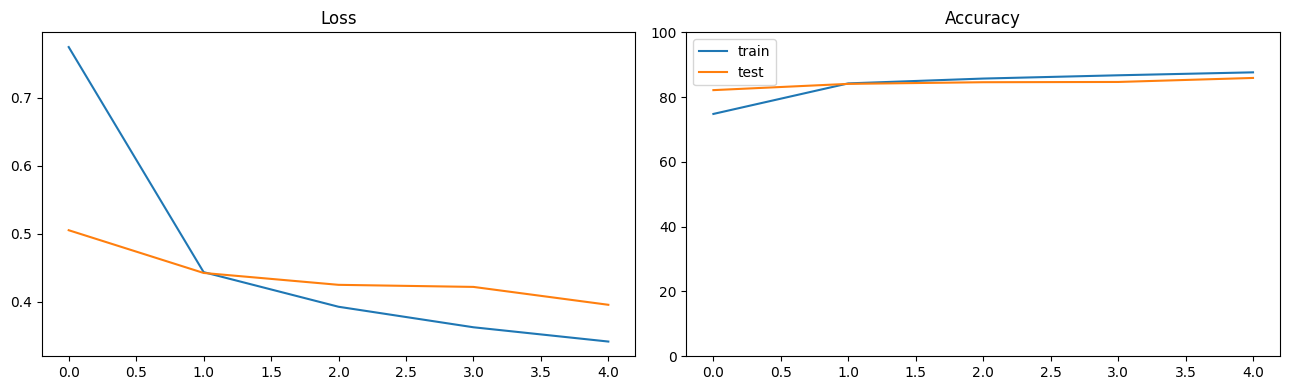

In [7]:
collect = {}

activation_list = [
    'linear',
    'relu',
    'tanh',
    'elu',
    'softplus',
    'sigmoid'
]

for act in activation_list:
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=act),
        tf.keras.layers.Dense(64, activation=act),
        tf.keras.layers.Dense(10)
    ])

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.001),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    #model.summary()

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
    print(act)
    plot_history(history)
    collect[act] = history.history['val_sparse_categorical_accuracy']

In [8]:
pd.DataFrame(collect).T.style.background_gradient(cmap='viridis')

,0,1,2,3,4
linear,0.805900,0.805200,0.820600,0.819000,0.814600
relu,0.831600,0.843300,0.848400,0.862200,0.858800
tanh,0.839600,0.851300,0.857800,0.859200,0.863300
elu,0.842000,0.848200,0.857700,0.856900,0.864200
softplus,0.838200,0.843500,0.853600,0.859100,0.865700
sigmoid,0.821600,0.840900,0.846000,0.846800,0.859200


## Functional API

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_16          │ (None, 784)       │          0 │ input_layer_16[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_48 (Dense)    │ (None, 128)       │    100,480 │ flatten_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_49 (Dense)    │ (None, 64)        │     50,240 │ flatten_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ dense_48[0][0],   │
│ (Concatenate)       │                   │            │ dense_49[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 10)        │      1,930 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 152,650 (596.29 KB)

 Trainable params: 152,650 (596.29 KB)

 Non-trainable params: 0 (0.00 B)

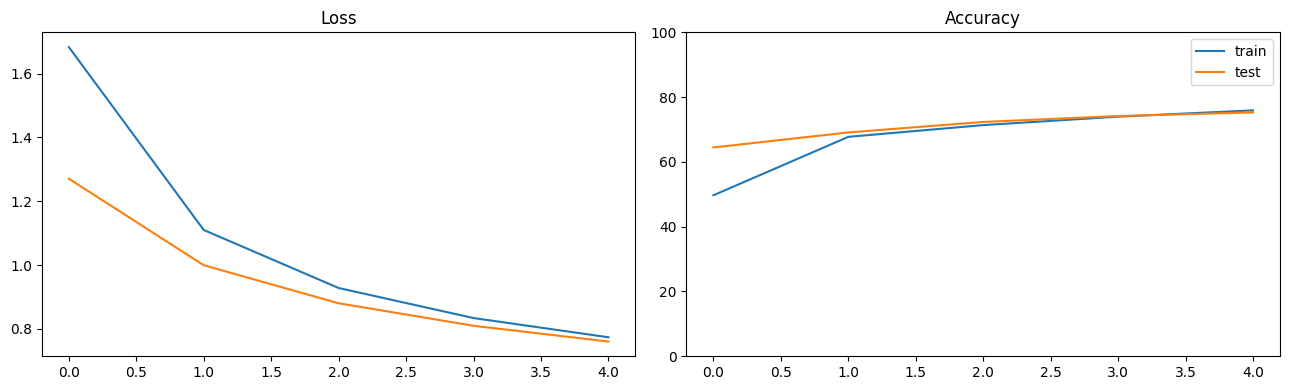

In [9]:
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate
from tensorflow.keras.models import Model

input = Input(shape=(28, 28))

flatten = Flatten(input_shape=(28, 28))(input)

dense1 = Dense(units=128, activation='relu')(flatten)
dense2 = Dense(units=64, activation='tanh')(flatten)

conc = concatenate([dense1, dense2])

output = Dense(10)(conc)

model = Model(inputs=input, outputs=output)

model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=opt(learning_rate=0.001),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

model.summary()

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
plot_history(history)